In [1]:
import opendatasets as od
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
dataset_url = "https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset"
dataset_path = "plant-disease-recognition-dataset"

In [4]:
if not os.path.exists(dataset_path):
    od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset


100%|██████████| 1.25G/1.25G [00:11<00:00, 116MB/s] 


In [3]:
train_dir = os.path.join(dataset_path, "Train", "Train")
test_dir = os.path.join(dataset_path, "Test", "Test")
val_dir = os.path.join(dataset_path, "Validation", "Validation")

In [4]:
IMG_SIZE = 128

from PIL import Image  

def load_data(data_dir):
    images, labels = [], []
    class_names = sorted(os.listdir(data_dir))

    for label, category in enumerate(class_names):
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                img = Image.open(img_path).convert("RGB")  
                img = img.resize((IMG_SIZE, IMG_SIZE)) 
                img = np.array(img) / 255.0  
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels), class_names


In [5]:
X_train, y_train, class_names = load_data(train_dir)
X_test, y_test, _ = load_data(test_dir)
X_val, y_val, _ = load_data(val_dir)

In [6]:
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))
y_val = to_categorical(y_val, num_classes=len(class_names))

In [7]:
print("After to_categorical:")
print("y_train shape:", y_train.shape)
print("y_train sample:", y_train[1])

After to_categorical:
y_train shape: (1322, 3)
y_train sample: [1. 0. 0.]


In [8]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(X_train)

In [9]:
print(f"Training data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing data: {X_test.shape}, Labels: {y_test.shape}")
print(f"Validation data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Class Names: {class_names}")

Training data: (1322, 128, 128, 3), Labels: (1322, 3)
Testing data: (150, 128, 128, 3), Labels: (150, 3)
Validation data: (60, 128, 128, 3), Labels: (60, 3)
Class Names: ['Healthy', 'Powdery', 'Rust']


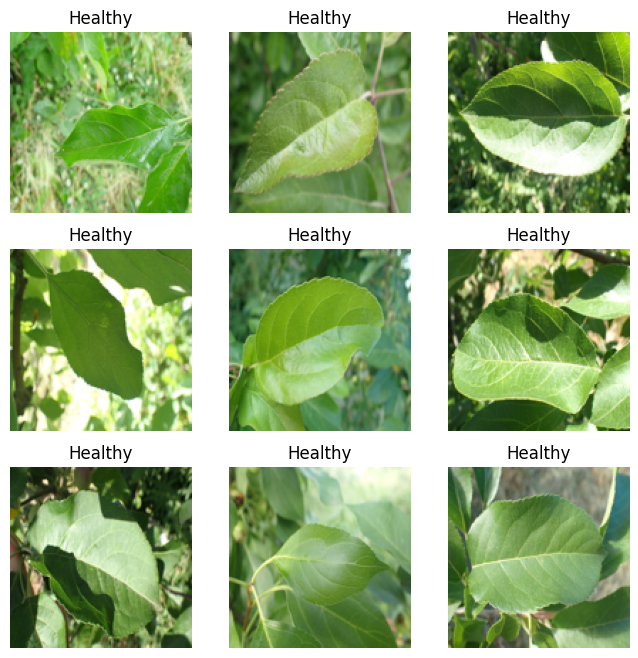

In [10]:
def plot_images(images, labels, class_names, num_images=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

plot_images(X_train, y_train, class_names)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # Output layer
])

model.summary()

d:\project\Plant_Dieases_detect\plant\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20
)

d:\project\Plant_Dieases_detect\plant\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.4887 - loss: 0.9905 - val_accuracy: 0.7000 - val_loss: 0.7017
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.7239 - loss: 0.6877 - val_accuracy: 0.7500 - val_loss: 0.5456
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.8222 - loss: 0.4878 - val_accuracy: 0.6500 - val_loss: 0.8110
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.8162 - loss: 0.5107 - val_accuracy: 0.7167 - val_loss: 0.7105
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - accuracy: 0.8510 - loss: 0.4255 - val_accuracy: 0.9167 - val_loss: 0.3107
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.8343 - loss: 0.4386 - val_accuracy: 0.8500 - val_loss: 0.4044
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 247ms/step - accuracy: 0.8767 - loss: 0.3728 - val_accuracy: 0.9000 - val_loss: 0.3692
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.8797 - loss: 0.3725 - val_accu

In [14]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9200 - loss: 0.3470
Test Accuracy: 0.9200


In [15]:
# Save the trained model
model.save("plant_disease_cnn.h5")

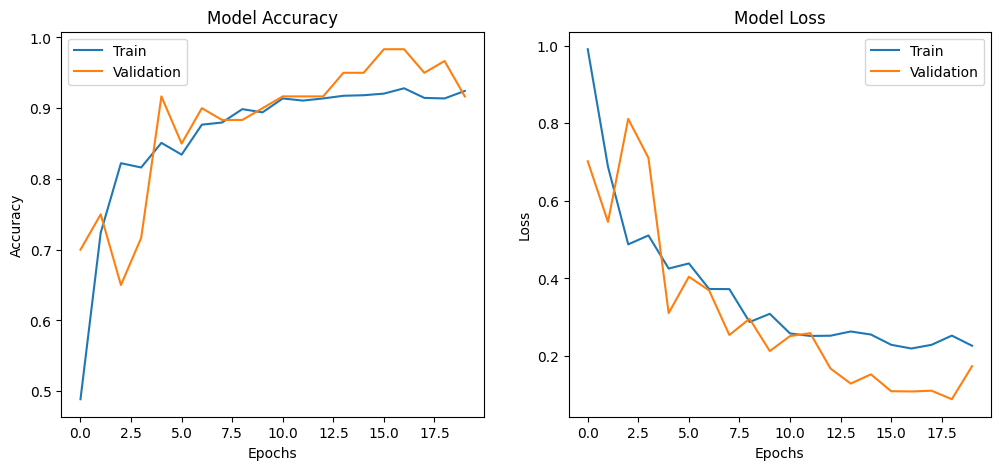

In [16]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    for i, metric in enumerate(["accuracy", "loss"]):
        plt.subplot(1, 2, i + 1)
        plt.plot(history.history[metric], label="Train")
        plt.plot(history.history[f"val_{metric}"], label="Validation")
        plt.xlabel("Epochs")
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.title(f"Model {metric.capitalize()}")

    plt.show()

plot_training_curves(history)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


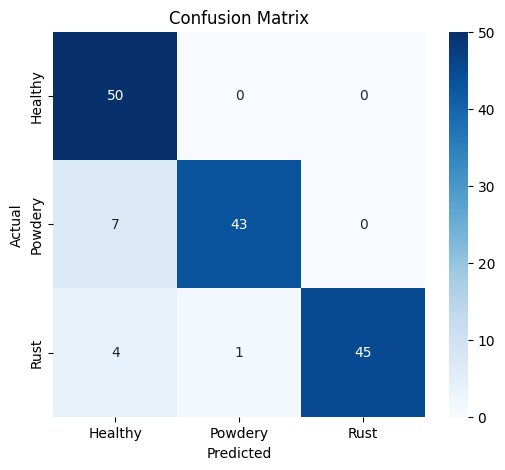

              precision    recall  f1-score   support

     Healthy       0.82      1.00      0.90        50
     Powdery       0.98      0.86      0.91        50
        Rust       1.00      0.90      0.95        50

    accuracy                           0.92       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.93      0.92      0.92       150



In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict on test data
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))
